In [1]:
#coding: utf-8

In [2]:
import numpy as np

from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from numpy import random

import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
def get_data(filename):
    data = load_svmlight_file(filename)
    return data[0], data[1]

In [4]:
iters = 500
X, y = get_data("australian_scale.txt")
print(X.shape)
print(y.shape)

(690, 14)
(690,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

X_train = X_train.toarray()
X_test = X_test.toarray()
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

(483, 14)
(207, 14)
(483,)
(207,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [6]:
# def train(X_train, X_test, y_train, y_test):
#     C = 1
#     a = 0.0001
    
#     train_loss = []
#     dev_loss = []
    
#     app = np.ones(X_train.shape[0]).reshape(-1, 1)
#     X_train = np.append(X_train,app,axis=1)
    
#     app_test = np.ones(X_test.shape[0]).reshape(-1, 1)
#     X_test = np.append(X_test,app_test,axis=1)
#     weight = random.random(size=(X_train.shape[1], 1))
#     for i in range(iters):
#         y_ = np.dot(X_train, weight)
#         cn_tmp = 1 - y_train.reshape(-1, 1) * y_      
#         cn_tmp[cn_tmp < 0] = 0
#         loss = np.sum(cn_tmp, axis=0)
#         loss = C * loss / X_train.shape[0]
#         train_loss.append(loss[0])
        
#         y_test = np.dot(X_test, weight)
#         cn_tmp_test = 1 - y_test.reshape(-1, 1) * y_test      
#         cn_tmp_test[cn_tmp_test < 0] = 0
#         test_loss = np.sum(cn_tmp_test, axis=0)
#         test_loss = C * test_loss / X_test.shape[0]
#         dev_loss.append(test_loss[0])
        
#         tmp = 1 - y_train.reshape(-1, 1) * y_
#         d = 0
#         for j in range(0, X_train.shape[0]):
#             if(tmp[j] > 0):
#                 d = d - (y_train[j].reshape(-1, 1) * X_train[j].reshape(-1, 1))
#         weight = weight - a * d
#     return train_loss, dev_loss, weight

In [7]:
def train(X_train, X_test, y_train, y_test):
    C = 1
    a = 0.1
    
    train_loss = []
    dev_loss = []
    
    app = np.ones(X_train.shape[0]).reshape(-1, 1)
    X_train = np.append(X_train,app,axis=1)
    
    app_test = np.ones(X_test.shape[0]).reshape(-1, 1)
    X_test = np.append(X_test,app_test,axis=1)
    weight = random.random(size=(X_train.shape[1], 1))
    for i in range(iters):
        y_ = np.dot(X_train, weight)
        cn_tmp = 1 - y_train.reshape(-1, 1) * y_      
        cn_tmp[cn_tmp < 0] = 0
        
        w = np.sum(np.power(weight, 2))
        
        loss = np.sum(cn_tmp, axis=0)
        loss = C * loss / X_train.shape[0] + w / 2
        train_loss.append(loss[0])
        
        y_test = np.dot(X_test, weight)
        cn_tmp_test = 1 - y_test.reshape(-1, 1) * y_test      
        cn_tmp_test[cn_tmp_test < 0] = 0
        test_loss = np.sum(cn_tmp_test, axis=0)
        test_loss = C * test_loss / X_test.shape[0] + w/2
        dev_loss.append(test_loss[0])
        
        tmp = 1 - y_train.reshape(-1, 1) * y_
        tmp[tmp > 0] = 1
        tmp[tmp <= 0] = 0
        
#         d = 0
#         for j in range(0, X_train.shape[0]):
#             if(tmp[j] > 0):
#                 d = d - (y_train[j].reshape(-1, 1) * X_train[j].reshape(-1, 1))
#         d =  weight + C * d / X_train.shape[0]

        d = y_train.reshape(-1, 1) * X_train
        d = d * tmp
        d = -np.mean(d, axis=0)
        d =  weight + C * d.reshape(-1, 1)
        weight = weight - a * d
    return train_loss, dev_loss, weight

In [8]:
train_loss, dev_loss, weight = train(X_train, X_test, y_train, y_test)

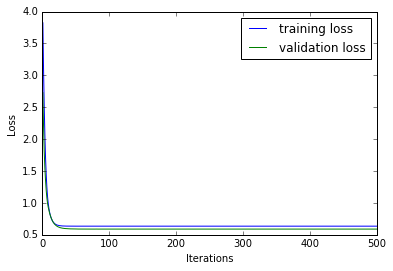

In [9]:
%matplotlib inline
plot_x = np.linspace(1, iters, iters)
train_loss = np.array(train_loss)
dev_loss = np.array(dev_loss)
plt.figure(1)
plt.plot(plot_x, train_loss, label="training loss")
plt.plot(plot_x, dev_loss, label="validation loss")
plt.legend(loc="upper right")
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

In [10]:
def predict(X):
    threshold = 0
    app = np.ones(X.shape[0]).reshape(-1, 1)
    X = np.append(X,app,axis=1)
    y_ = np.dot(X, weight)
    y_[y_ < threshold] = -1
    y_[y_ >= threshold] = 1
    return y_

In [11]:
ytest_ = predict(X_test)
target_names = ['class 1', 'class 2']
print(classification_report(y_test, ytest_.T[0], target_names=target_names))

             precision    recall  f1-score   support

    class 1       0.93      0.81      0.87       117
    class 2       0.79      0.92      0.85        90

avg / total       0.87      0.86      0.86       207

